# Pléiades Display (Download)

Pléiades 1A/1B are very-high resolution twin satellites offering 0.5m resolution products. The constellation is highly reactive and has been designed for daily revisit anywhere on Earth, with stereo and tri-stereo capacity. 

In the example, we use catalog search to find cloud-cover free images and plot their quicklooks. Then the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/defb134b-ca00-4e16-afa0-639c6dc0c5fe) and [Documentation](https://docs.up42.com/up42-blocks/data/pleiades-reflectance-download.html).

In [1]:
import up42

In [2]:
# Authenticate with UP42.
up42.authenticate(project_id="1234", project_api_key="5678")

2021-04-08 14:03:54,544 - Authentication with UP42 successful!


## Use Catalog Search to find available images

In [97]:
aoi = {"type": "FeatureCollection","features": [{"type": "Feature","properties": {},
      "geometry": {"type": "Polygon","coordinates": [[[13.373408317565918,52.51568549156065],
                                                      [13.381991386413574,52.51568549156065],
                                                      [13.381991386413574,52.519302392686626],
                                                      [13.373408317565918,52.519302392686626],
                                                      [13.373408317565918,52.51568549156065]]]}}]}

In [98]:
# Define the search parameters and run the search.
catalog = up42.initialize_catalog()
search_paramaters = catalog.construct_parameters(geometry=aoi, 
                                                 start_date="2020-04-23",
                                                 end_date="2020-04-28",
                                                 sensors=["pleiades"],
                                                 max_cloudcover=100,
                                                 sortby="acquisitionDate",
                                                 limit=3)

search_results = catalog.search(search_paramaters)
search_results

2021-04-08 15:12:55,127 - Searching catalog with search_parameters: {'datetime': '2020-04-23T00:00:00Z/2020-04-28T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((13.373408317565918, 52.51568549156065), (13.381991386413574, 52.51568549156065), (13.381991386413574, 52.519302392686626), (13.373408317565918, 52.519302392686626), (13.373408317565918, 52.51568549156065)),)}, 'limit': 3, 'query': {'dataBlock': {'in': ['oneatlas-pleiades-fullscene', 'oneatlas-pleiades-display', 'oneatlas-pleiades-aoiclipped']}, 'cloudCoverage': {'lte': 100}}, 'sortby': [{'field': 'properties.acquisitionDate', 'direction': 'asc'}]}
2021-04-08 15:12:55,750 - 3 results returned.


,geometry,id,acquisitionDate,constellation,collection,providerName,blockNames,cloudCoverage,up42:usageType,providerProperties,sceneId,resolution,deliveryTime,producer
0,"POLYGON ((13.21858 52.45587, 13.34190 52.45724...",3c89938c-e669-4525-959b-62ba46c904e2,2020-04-23T10:19:52Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000000,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1B_202004231019525_FR1_PX_E013N52_0513_0...,0.7,HOURS,Airbus
1,"POLYGON ((13.21800 52.58082, 13.21860 52.45684...",07e5eaba-7830-4aee-8c27-6b69fa1da89f,2020-04-23T10:19:52Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.000000,"[DATA, ANALYTICS]","{'commercialReference': 'SO20022129', 'qualifi...",DS_PHR1B_202004231019525_FR1_PX_E013N52_0513_0...,0.5,MINUTES,Airbus
2,"POLYGON ((13.33197 52.33049, 13.46304 52.32930...",804c50f2-4093-4b85-ab84-e328b8fc47f1,2020-04-28T10:31:23Z,PHR,PHR,oneatlas,"[oneatlas-pleiades-display, oneatlas-pleiades-...",0.013443,[DATA],"{'qualified': False, 'acquisitionDate': '2020-...",DS_PHR1B_202004281031230_FR1_PX_E013N52_0612_0...,0.7,HOURS,Airbus


2021-04-08 14:57:48,773 - Getting quicklooks from provider oneatlas for image_ids: ['3c89938c-e669-4525-959b-62ba46c904e2', '07e5eaba-7830-4aee-8c27-6b69fa1da89f', '804c50f2-4093-4b85-ab84-e328b8fc47f1']
2021-04-08 14:57:48,776 - Download directory: /Users/christoph.rieke/repos/up42-py/examples/data-block-examples/project_75d25f7a-426d-495f-8cfa-e54a57d2da74/catalog
100%|██████████| 3/3 [00:03<00:00,  1.23s/it]


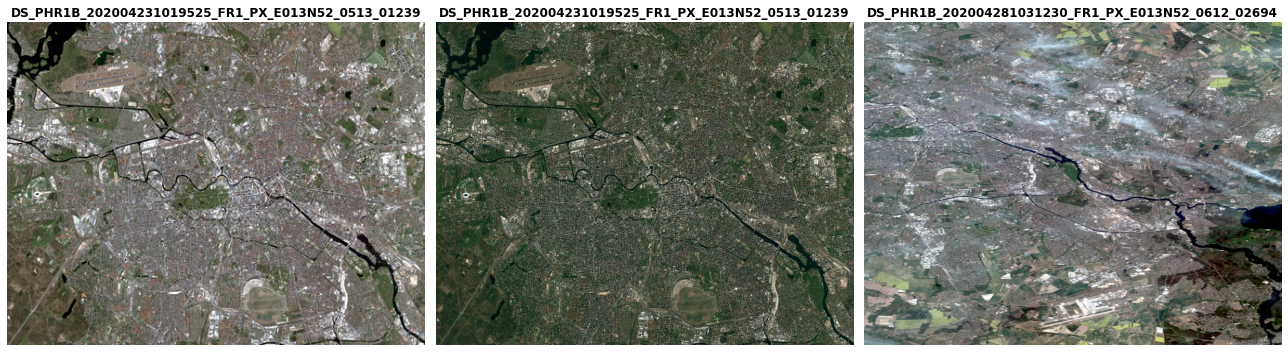

In [85]:
# Download & visualise the full-scene preview images.
catalog.download_quicklooks(image_ids=search_results.id.to_list(), sensor="pleiades")
catalog.plot_quicklooks(figsize=(18,5), titles=search_results.sceneId.to_list())

## Run the Pleiades workflow for the aoi

In [87]:
project = up42.initialize_project()
workflow = project.create_workflow(name="Pléiades-display-example")
workflow.add_workflow_tasks(["Pléiades Display (Download)", "DIMAP -> GeoTIFF Conversion"])

2021-04-08 14:58:28,888 - Initialized Project(name: parallel, project_id: 75d25f7a-426d-495f-8cfa-e54a57d2da74, description: , createdAt: 2020-07-23T21:35:58.768Z, env: dev)
2021-04-08 14:58:30,554 - Created new workflow: 0c740a70-aa2a-46d4-ba2a-be10ae5e90e9
2021-04-08 14:58:35,058 - Added tasks to workflow: [{'name': 'oneatlas-pleiades-display:1', 'parentName': None, 'blockId': '332292ce-e34f-4ab5-8a7a-adaa3abbd42b'}, {'name': 'data-conversion-dimap:1', 'parentName': 'oneatlas-pleiades-display:1', 'blockId': '25f42430-d108-4ea4-a81d-2c2b3fff7d11'}]


In [88]:
# Define the workflow parameters and select which scene from the catalog search results to download.
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox", 
                                                 scene_ids=['DS_PHR1B_202004231019525_FR1_PX_E013N52_0513_01239'])

In [99]:
# Estimate the price.
estimate = workflow.estimate_job(input_parameters)

2021-04-08 15:13:32,526 - Estimated: 237-249 Credits, Duration: 43-62 min.


In [91]:
# Run the workflow as a job
job = workflow.run_job(input_parameters, track_status=True)

2021-04-08 14:59:21,630 - Selected input_parameters: {'oneatlas-pleiades-display:1': {'limit': 1, 'max_cloud_cover': 100, 'ids': ['DS_PHR1B_202004231019525_FR1_PX_E013N52_0513_01239'], 'bbox': [13.373408317565918, 52.51568549156065, 13.381991386413574, 52.519302392686626]}, 'data-conversion-dimap:1': {'ms': True, 'pan': False, 'clip_to_aoi': False}}
2021-04-08 14:59:32,631 - Created and running new job: f10911ef-2ad4-4889-a851-fd00840fe3a7.
2021-04-08 14:59:33,198 - Tracking job status continuously, reporting every 30 seconds...
2021-04-08 15:00:07,495 - Job is RUNNING! - f10911ef-2ad4-4889-a851-fd00840fe3a7
2021-04-08 15:00:41,612 - Job is RUNNING! - f10911ef-2ad4-4889-a851-fd00840fe3a7
2021-04-08 15:01:14,822 - Job is RUNNING! - f10911ef-2ad4-4889-a851-fd00840fe3a7
2021-04-08 15:01:48,415 - Job is RUNNING! - f10911ef-2ad4-4889-a851-fd00840fe3a7
2021-04-08 15:02:21,837 - Job is RUNNING! - f10911ef-2ad4-4889-a851-fd00840fe3a7
2021-04-08 15:02:55,252 - Job is RUNNING! - f10911ef-2ad4-48

In [96]:
# Downlod & Visualize results.
job.download_results()
job.map_results(aoi=aoi)